In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pathlib
import PIL.Image as Image

In [2]:
dataset_dir_train = pathlib.Path('dataset/train/')
train_dogs = list(dataset_dir_train.glob('dogs/*.jpg'))
train_cats = list(dataset_dir_train.glob('cats/*.jpg'))
len(train_dogs), len(train_cats)

(250, 250)

In [3]:
dataset_dir_train = pathlib.Path('dataset/test/')
test_dogs = list(dataset_dir_train.glob('dogs/*.jpg'))
test_cats = list(dataset_dir_train.glob('cats/*.jpg'))
len(test_dogs), len(test_cats)

(50, 50)

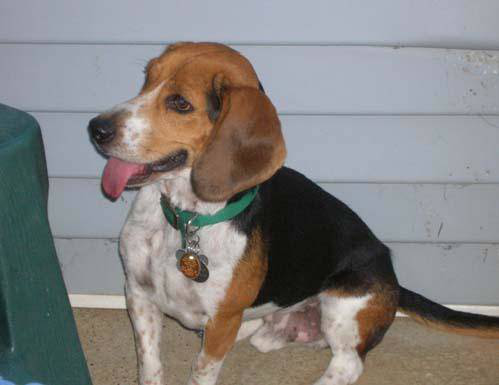

In [4]:
Image.open(train_dogs[0])

In [5]:
img = cv2.imread(str(train_dogs[0]))
img.shape

(385, 499, 3)

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(385, 499, 3)

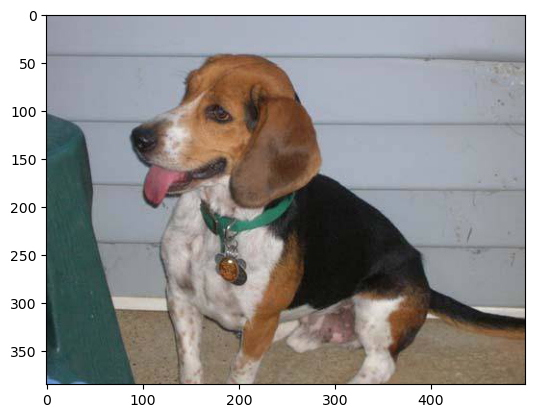

In [7]:
plt.imshow(img)
plt.show()

In [8]:
resized_img = cv2.resize(img, (64, 64))
resized_img.shape

(64, 64, 3)

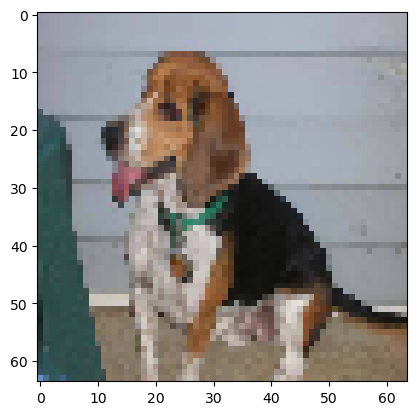

In [9]:
plt.imshow(resized_img)
plt.show()

In [10]:
train_dogs_arr, train_cats_arr, test_dogs_arr, test_cats_arr = [[] for _ in range(4)]

for el in train_dogs:
    img_res = cv2.resize(cv2.imread(str(el)), (64, 64))
    train_dogs_arr.append(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))
    # train_dogs_arr.append(cv2.resize(cv2.imread(str(el)), (64, 64)))
for el in train_cats:
    img_res = cv2.resize(cv2.imread(str(el)), (64, 64))
    train_cats_arr.append(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))
    # train_cats_arr.append(cv2.resize(cv2.imread(str(el)), (64, 64)))
for el in test_dogs:
    img_res = cv2.resize(cv2.imread(str(el)), (64, 64))
    test_dogs_arr.append(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))
    # test_dogs_arr.append(cv2.resize(cv2.imread(str(el)), (64, 64)))
for el in test_cats:
    img_res = cv2.resize(cv2.imread(str(el)), (64, 64))
    test_cats_arr.append(cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB))
    # test_cats_arr.append(cv2.resize(cv2.imread(str(el)), (64, 64)))

In [11]:
train_dogs_arr = np.array(train_dogs_arr) / 255
train_cats_arr = np.array(train_cats_arr) / 255
test_dogs_arr = np.array(test_dogs_arr) / 255
test_cats_arr = np.array(test_cats_arr) / 255

In [12]:
train_dogs_arr.shape, train_cats_arr.shape, test_dogs_arr.shape, test_cats_arr.shape

((250, 64, 64, 3), (250, 64, 64, 3), (50, 64, 64, 3), (50, 64, 64, 3))

In [13]:
y_train = []
for i in range(train_dogs_arr.shape[0]):
    y_train.append(0)
for i in range(train_cats_arr.shape[0]):
    y_train.append(1)

y_test = []
for i in range(test_dogs_arr.shape[0]):
    y_test.append(0)
for i in range(test_cats_arr.shape[0]):
    y_test.append(1)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
train_dogs_arr[0]

array([[[0.59215686, 0.6       , 0.65882353],
        [0.6       , 0.60784314, 0.66666667],
        [0.60392157, 0.61176471, 0.67058824],
        ...,
        [0.65490196, 0.66666667, 0.69411765],
        [0.65098039, 0.6627451 , 0.69019608],
        [0.64313725, 0.65490196, 0.68235294]],

       [[0.58431373, 0.59215686, 0.65098039],
        [0.59215686, 0.6       , 0.65882353],
        [0.60392157, 0.61176471, 0.67058824],
        ...,
        [0.65098039, 0.6627451 , 0.69019608],
        [0.65098039, 0.6627451 , 0.69019608],
        [0.63921569, 0.65098039, 0.67843137]],

       [[0.58431373, 0.59215686, 0.65098039],
        [0.59215686, 0.6       , 0.65882353],
        [0.60392157, 0.61176471, 0.67058824],
        ...,
        [0.65098039, 0.6627451 , 0.69019608],
        [0.65098039, 0.6627451 , 0.69019608],
        [0.63921569, 0.65098039, 0.67843137]],

       ...,

       [[0.18823529, 0.30196078, 0.30980392],
        [0.18039216, 0.32941176, 0.34901961],
        [0.20392157, 0

In [15]:
train_cats_arr[0]

array([[[0.82352941, 0.7254902 , 0.76470588],
        [0.81960784, 0.71764706, 0.76078431],
        [0.81960784, 0.71764706, 0.76078431],
        ...,
        [0.63529412, 0.6627451 , 0.63529412],
        [0.74117647, 0.79607843, 0.83921569],
        [0.74901961, 0.74901961, 0.77647059]],

       [[0.80392157, 0.72156863, 0.75686275],
        [0.80784314, 0.7254902 , 0.76078431],
        [0.80784314, 0.7254902 , 0.76078431],
        ...,
        [0.64313725, 0.65882353, 0.64705882],
        [0.71372549, 0.78823529, 0.81568627],
        [0.7372549 , 0.70980392, 0.71372549]],

       [[0.9372549 , 0.9254902 , 0.9372549 ],
        [0.9254902 , 0.91372549, 0.9254902 ],
        [0.94509804, 0.93333333, 0.94901961],
        ...,
        [0.64705882, 0.64313725, 0.64705882],
        [0.70196078, 0.79215686, 0.81568627],
        [0.68235294, 0.61568627, 0.60784314]],

       ...,

       [[0.50980392, 0.14901961, 0.19215686],
        [0.50588235, 0.14509804, 0.18823529],
        [0.50196078, 0

In [16]:
np.stack([train_dogs_arr[0], train_cats_arr[0]], axis=0)

array([[[[0.59215686, 0.6       , 0.65882353],
         [0.6       , 0.60784314, 0.66666667],
         [0.60392157, 0.61176471, 0.67058824],
         ...,
         [0.65490196, 0.66666667, 0.69411765],
         [0.65098039, 0.6627451 , 0.69019608],
         [0.64313725, 0.65490196, 0.68235294]],

        [[0.58431373, 0.59215686, 0.65098039],
         [0.59215686, 0.6       , 0.65882353],
         [0.60392157, 0.61176471, 0.67058824],
         ...,
         [0.65098039, 0.6627451 , 0.69019608],
         [0.65098039, 0.6627451 , 0.69019608],
         [0.63921569, 0.65098039, 0.67843137]],

        [[0.58431373, 0.59215686, 0.65098039],
         [0.59215686, 0.6       , 0.65882353],
         [0.60392157, 0.61176471, 0.67058824],
         ...,
         [0.65098039, 0.6627451 , 0.69019608],
         [0.65098039, 0.6627451 , 0.69019608],
         [0.63921569, 0.65098039, 0.67843137]],

        ...,

        [[0.18823529, 0.30196078, 0.30980392],
         [0.18039216, 0.32941176, 0.34901961]

In [17]:
X_train = np.concatenate([train_dogs_arr, train_cats_arr])
X_test = np.concatenate([test_dogs_arr, test_cats_arr])

In [18]:
X_train.shape

(500, 64, 64, 3)

In [19]:
X_train.shape[1:]

(64, 64, 3)

In [20]:
X_train.shape, len(y_train)

((500, 64, 64, 3), 500)

In [21]:
indices = np.random.permutation(X_train.shape[0])

shuffled_X_train = X_train[indices]
shuffled_y_train = y_train[indices]

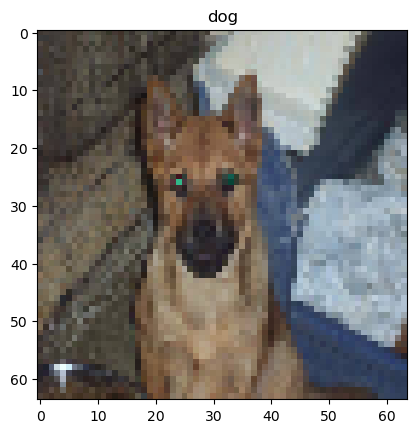

In [22]:
rnd_idx = np.random.randint(0, shuffled_X_train.shape[0])
plt.title('dog' if shuffled_y_train[rnd_idx] == 0 else 'cat')
plt.imshow(shuffled_X_train[rnd_idx])
plt.show()

In [23]:
shuffled_X_train.shape, shuffled_y_train.shape

((500, 64, 64, 3), (500,))

In [24]:
shuffled_X_train.shape[1:]

(64, 64, 3)

In [25]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), input_shape=shuffled_X_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [27]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
history = model.fit(shuffled_X_train, shuffled_y_train, epochs=50, batch_size=16, verbose=2)

Epoch 1/50


2024-05-18 10:25:04.806506: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 - 1s - loss: 0.7193 - accuracy: 0.4600 - 611ms/epoch - 19ms/step
Epoch 2/50
32/32 - 0s - loss: 0.6857 - accuracy: 0.5080 - 353ms/epoch - 11ms/step
Epoch 3/50
32/32 - 0s - loss: 0.6672 - accuracy: 0.5840 - 391ms/epoch - 12ms/step
Epoch 4/50
32/32 - 0s - loss: 0.6364 - accuracy: 0.6340 - 374ms/epoch - 12ms/step
Epoch 5/50
32/32 - 0s - loss: 0.6123 - accuracy: 0.6660 - 378ms/epoch - 12ms/step
Epoch 6/50
32/32 - 0s - loss: 0.5516 - accuracy: 0.7340 - 376ms/epoch - 12ms/step
Epoch 7/50
32/32 - 0s - loss: 0.5215 - accuracy: 0.7560 - 407ms/epoch - 13ms/step
Epoch 8/50
32/32 - 0s - loss: 0.4533 - accuracy: 0.8240 - 414ms/epoch - 13ms/step
Epoch 9/50
32/32 - 0s - loss: 0.3861 - accuracy: 0.8480 - 418ms/epoch - 13ms/step
Epoch 10/50
32/32 - 0s - loss: 0.3674 - accuracy: 0.8560 - 376ms/epoch - 12ms/step
Epoch 11/50
32/32 - 0s - loss: 0.2903 - accuracy: 0.8980 - 387ms/epoch - 12ms/step
Epoch 12/50
32/32 - 1s - loss: 0.2583 - accuracy: 0.9260 - 604ms/epoch - 19ms/step
Epoch 13/50
32/32 - 1s -

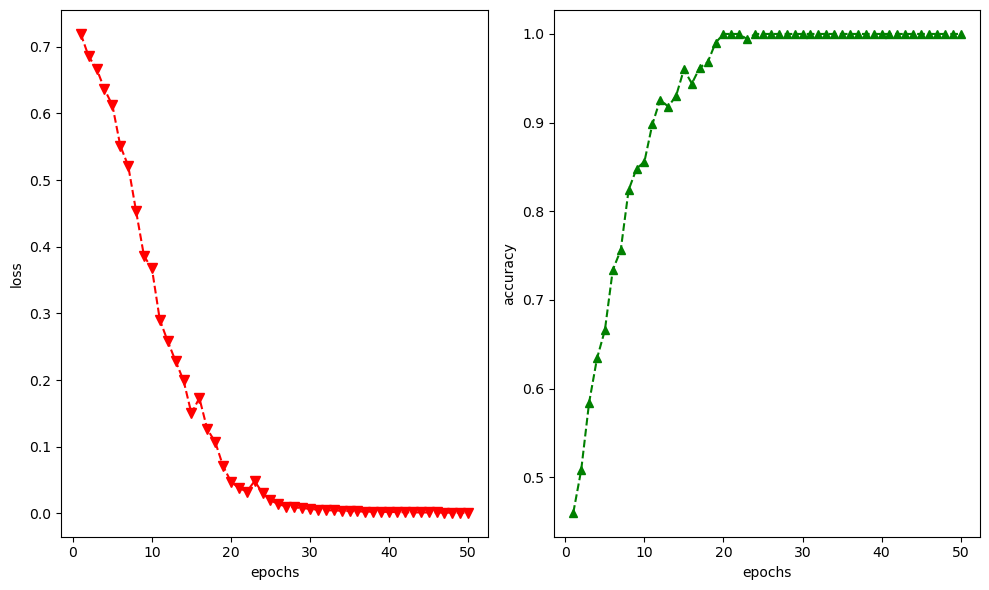

In [29]:
loss, acc = history.history['loss'], history.history['accuracy']
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(range(1, len(loss) + 1), loss, 'r--v', markersize=7)
plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(range(1, len(loss) + 1), acc, 'g--^')
plt.tight_layout()
plt.show()

In [30]:
print('Loss: {}\nAccuracy: {}'.format(*model.evaluate(X_test, np.array(y_test), verbose=0)))

Loss: 2.077350378036499
Accuracy: 0.6299999952316284


In [31]:
pred_1 = pathlib.Path('dataset/prediction/cat_or_dog_1.jpg')
pred_1 = cv2.resize(cv2.imread(str(pred_1)), (64, 64))
pred_1 = cv2.cvtColor(pred_1, cv2.COLOR_BGR2RGB) / 255
pred_1.shape

(64, 64, 3)

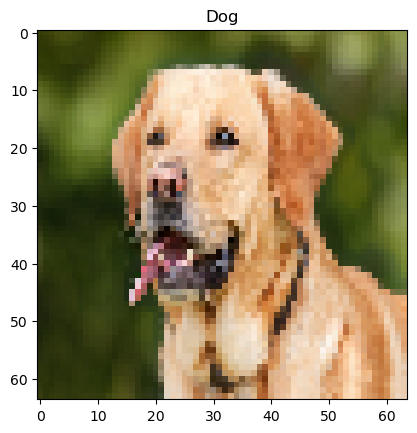

In [32]:
res_1 = model.predict(np.expand_dims(pred_1, axis=0), verbose=0)[0, 0]

plt.title('Dog' if res_1 <= 0.5 else 'Cat')
plt.imshow(pred_1)
plt.show()

In [33]:
pred_2 = pathlib.Path('dataset/prediction/cat_or_dog_2.jpg')
pred_2 = cv2.resize(cv2.imread(str(pred_2)), (64, 64))
pred_2 = cv2.cvtColor(pred_2, cv2.COLOR_BGR2RGB) / 255
pred_2.shape

(64, 64, 3)

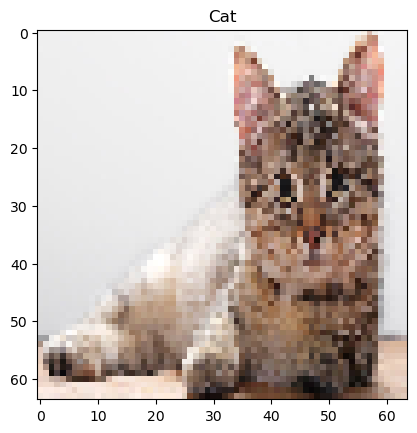

In [34]:
res_2 = model.predict(np.expand_dims(pred_2, axis=0), verbose=0)[0, 0]
plt.title('Dog' if res_2 <= 0.5 else 'Cat')
plt.imshow(pred_2)
plt.show()